<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install pmdarima

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [20]:
df=pd.read_csv('/content/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [21]:
df['date']=pd.to_datetime(pd.to_datetime({'year':df['year'],'month':df['month'],'day':1}))

In [22]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [27]:
df.set_index('date',inplace=True)
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<Axes: xlabel='date'>

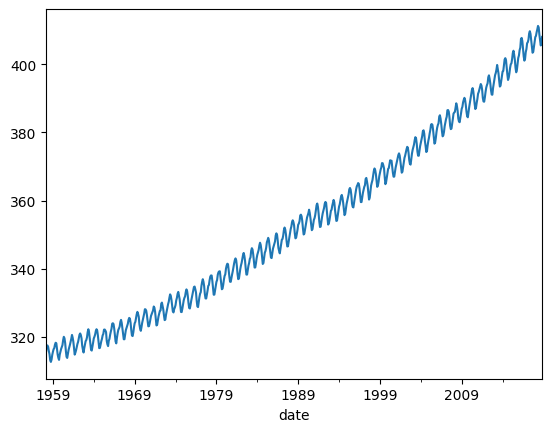

In [28]:
df['interpolated'].plot()

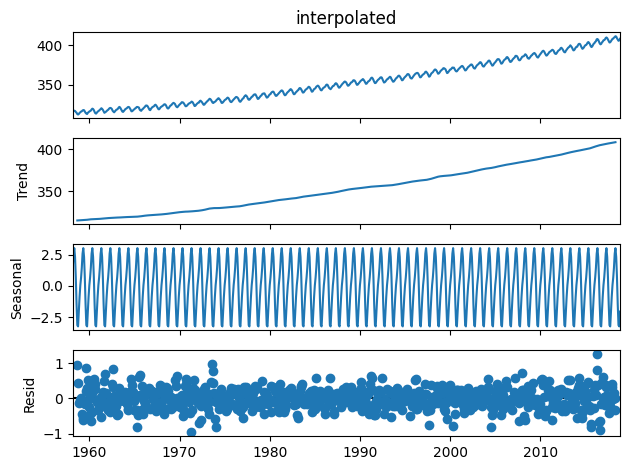

In [29]:
result=seasonal_decompose(df['interpolated'],model='add')
result.plot();

In [ ]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()